<a href="https://colab.research.google.com/github/yvuldzhev/Azure-HDInsight-Kafka/blob/master/kafka_latency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dataframe= pd.read_csv("lettera.csv", delimiter=','sep=r', ') 
data = pd.read_csv("/content/big_results.csv", delimiter=',')
data

,topic,created,received,latency
0,orders,1622651189001,1622651189095,94
1,orders,1622651190235,1622651190298,63
2,orders,1622651190298,1622651190360,62
3,orders,1622651190360,1622651190423,63
4,orders,1622651190423,1622651190485,62
...,...,...,...,...
5995,orders,1622651414917,1622651414980,63
5996,orders,1622651414995,1622651415058,63
5997,orders,1622651415058,1622651415105,47
5998,orders,1622651415105,1622651415183,78


In [37]:
df=pd.DataFrame(data)
df

,topic,created,received,latency
0,orders,1622651189001,1622651189095,94
1,orders,1622651190235,1622651190298,63
2,orders,1622651190298,1622651190360,62
3,orders,1622651190360,1622651190423,63
4,orders,1622651190423,1622651190485,62
...,...,...,...,...
5995,orders,1622651414917,1622651414980,63
5996,orders,1622651414995,1622651415058,63
5997,orders,1622651415058,1622651415105,47
5998,orders,1622651415105,1622651415183,78


In [38]:
df.describe

<bound method NDFrame.describe of        topic        created       received  latency
0     orders  1622651189001  1622651189095       94
1     orders  1622651190235  1622651190298       63
2     orders  1622651190298  1622651190360       62
3     orders  1622651190360  1622651190423       63
4     orders  1622651190423  1622651190485       62
...      ...            ...            ...      ...
5995  orders  1622651414917  1622651414980       63
5996  orders  1622651414995  1622651415058       63
5997  orders  1622651415058  1622651415105       47
5998  orders  1622651415105  1622651415183       78
5999  orders  1622651415183  1622651415245       62

[6000 rows x 4 columns]>

In [42]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['topic', 'created', 'received', 'latency'], dtype='object')

In [59]:
df['latency'] = df['latency'].astype(float)

In [60]:
q95 = df["latency"].quantile(0.95)
q95

79.0

In [61]:
q50 = df["latency"].quantile(0.50)
q50

63.0

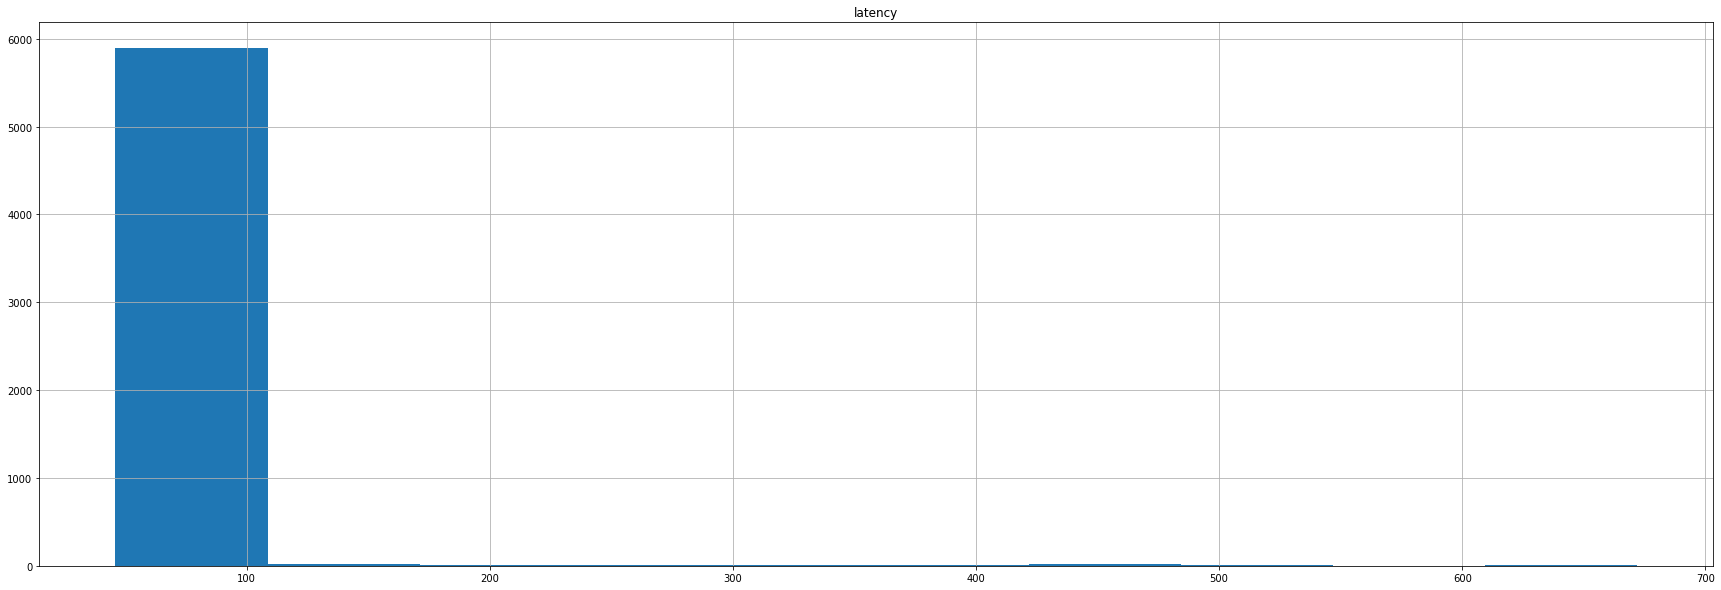

In [67]:
features = ["latency"]
df[features].hist(figsize=(30, 10));

In [65]:
lower = df.latency.quantile(.05)
upper = df.latency.quantile(.95)

df_filtered = df[(df["latency"] < upper) & (df["latency"] > lower)]

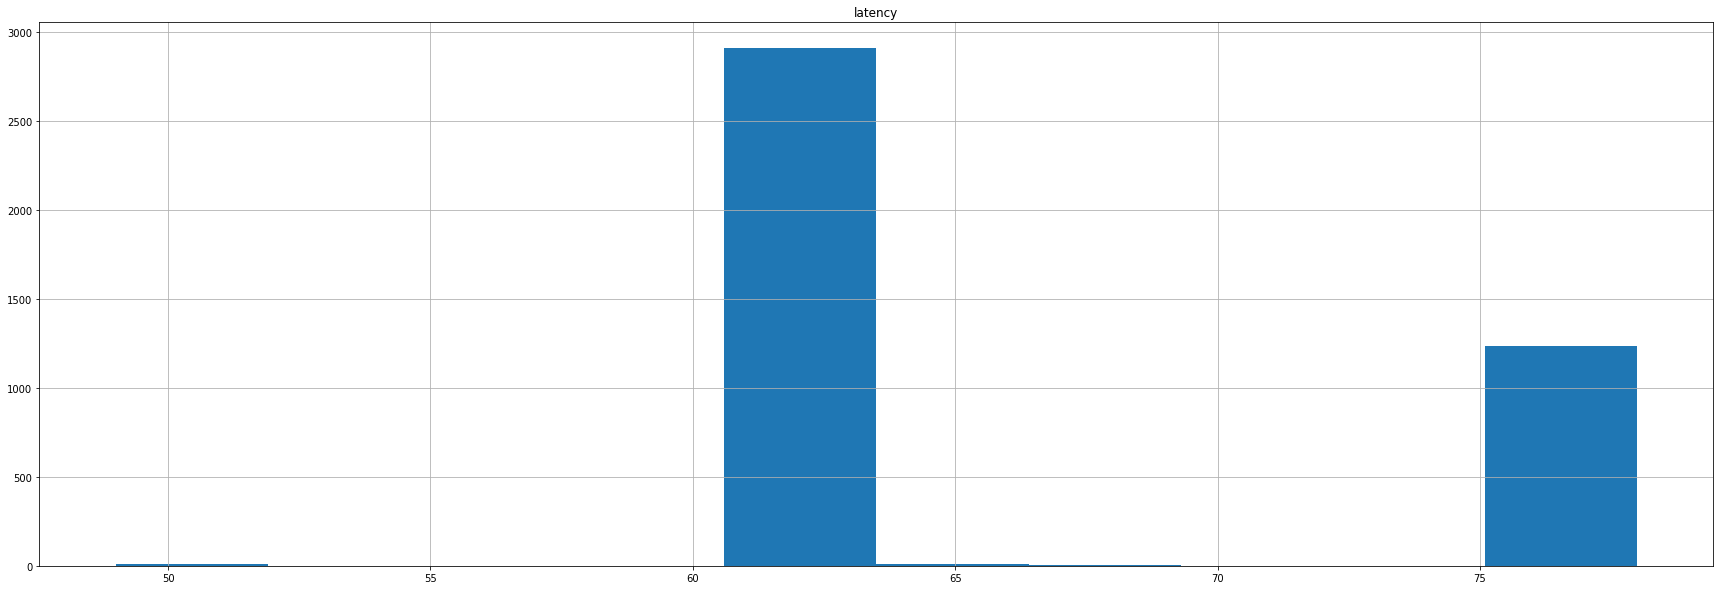

In [66]:
features = ["latency"]
df_filtered[features].hist(figsize=(30, 10));

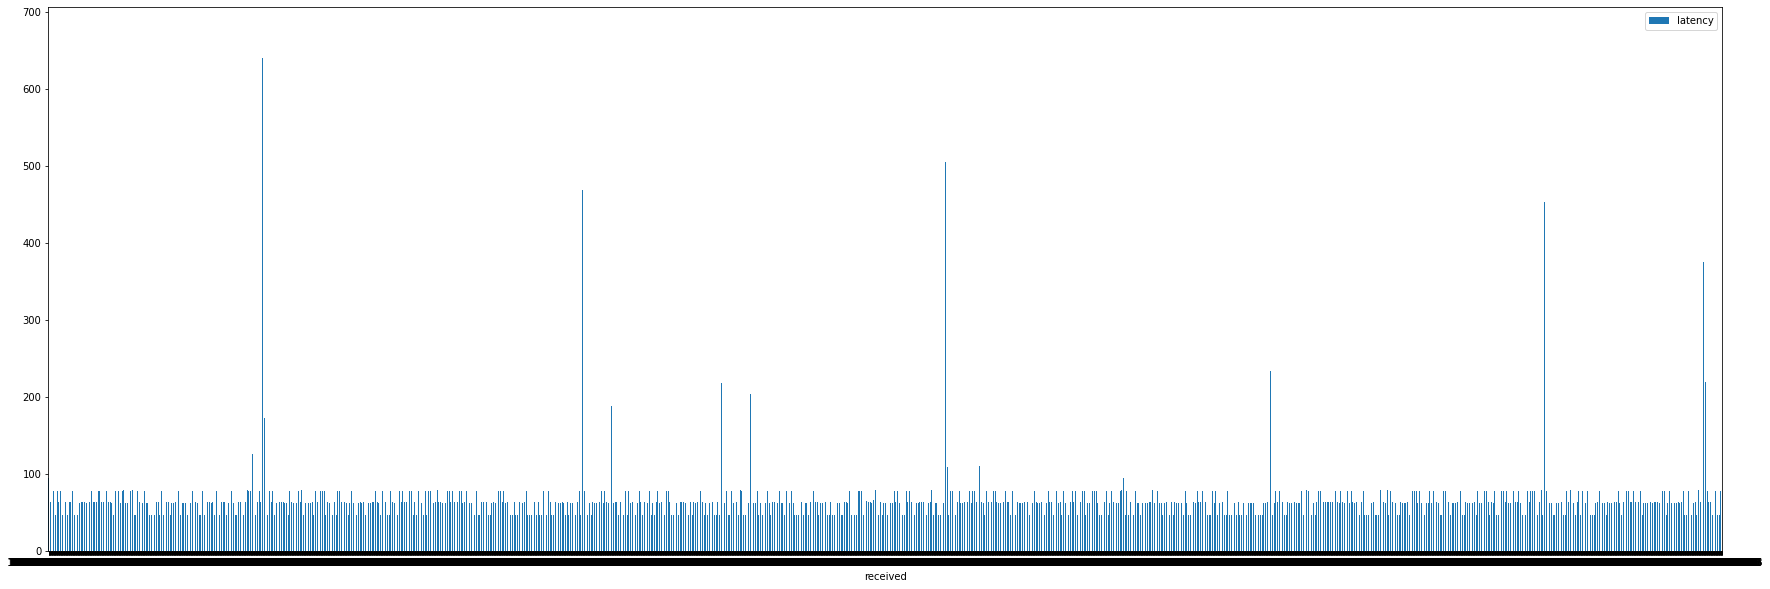

In [75]:
#df.plot(figsize=[30,10]).bar(y='latency', x='received')
#df.plot(kind='bar',figsize=(30,15)).bar(y='latency', x='received')
df.plot.bar(x='received', y='latency', rot=0, figsize=(30, 10))